**Diabetes Patient Prediction**

---

Classification & Decision Tree

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('diabetes.csv')

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df['BMI'].value_counts()

,count
BMI,
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
36.7,1
41.8,1
42.6,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


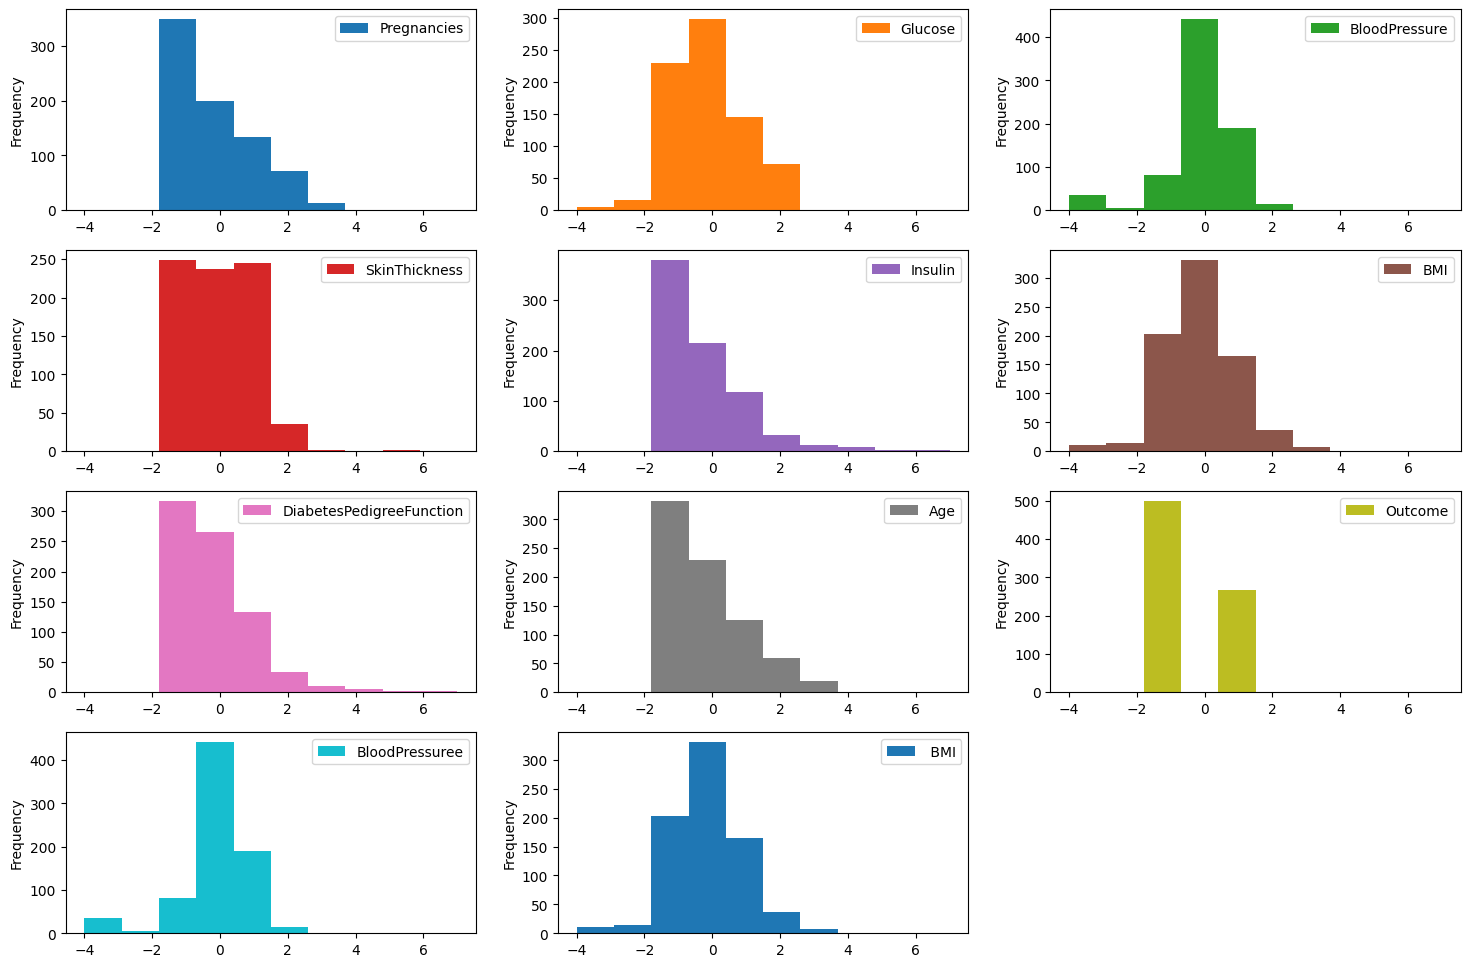

In [70]:

#visualize the imbalance to see nak guna median or mean or see correlation
#histogram
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (18, 12)
df.plot(kind='hist', subplots=True, layout=(4, 3), sharex=False, sharey=False) # Changed layout to (4,3) to accommodate 11 plots
plt.show()


In [8]:
#there is imbalance

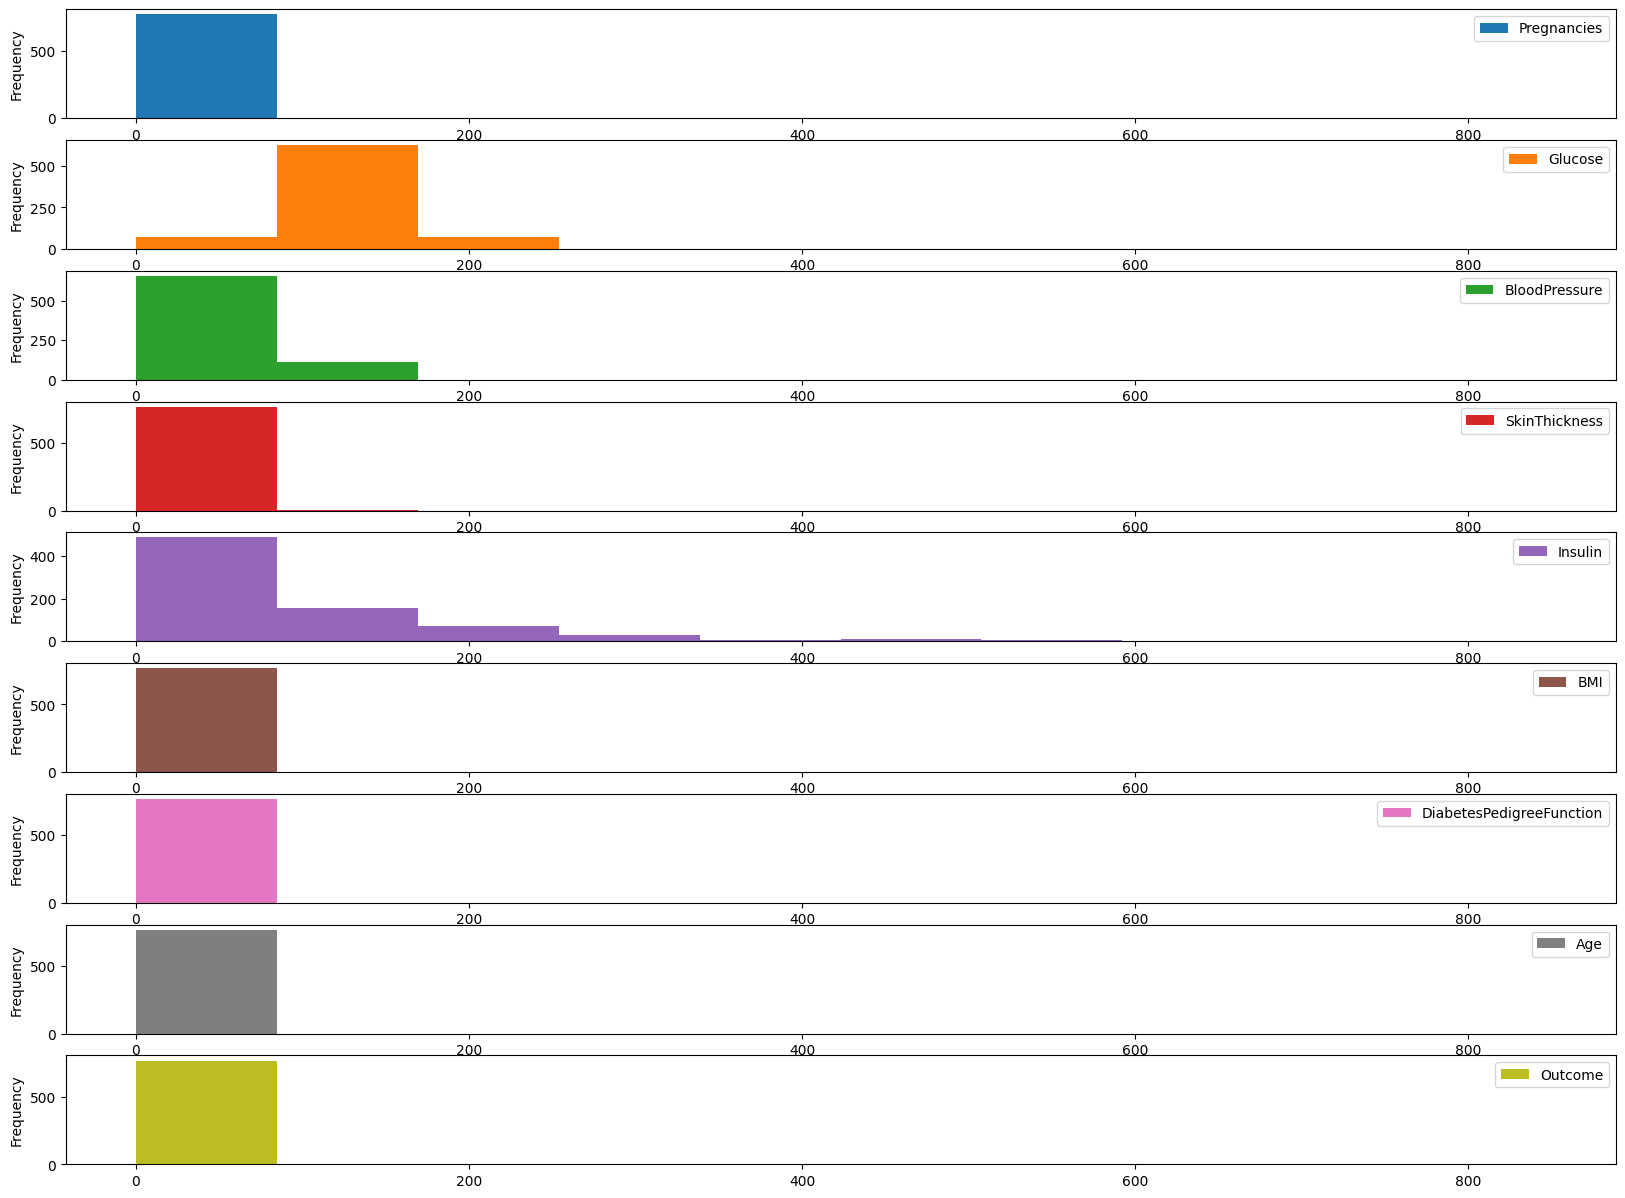

In [9]:
#histogram

plt.rcParams['figure.figsize'] = (20,15)

df.plot(kind='hist', bins=10, subplots=True, sharex=False, sharey=False)

plt.show()

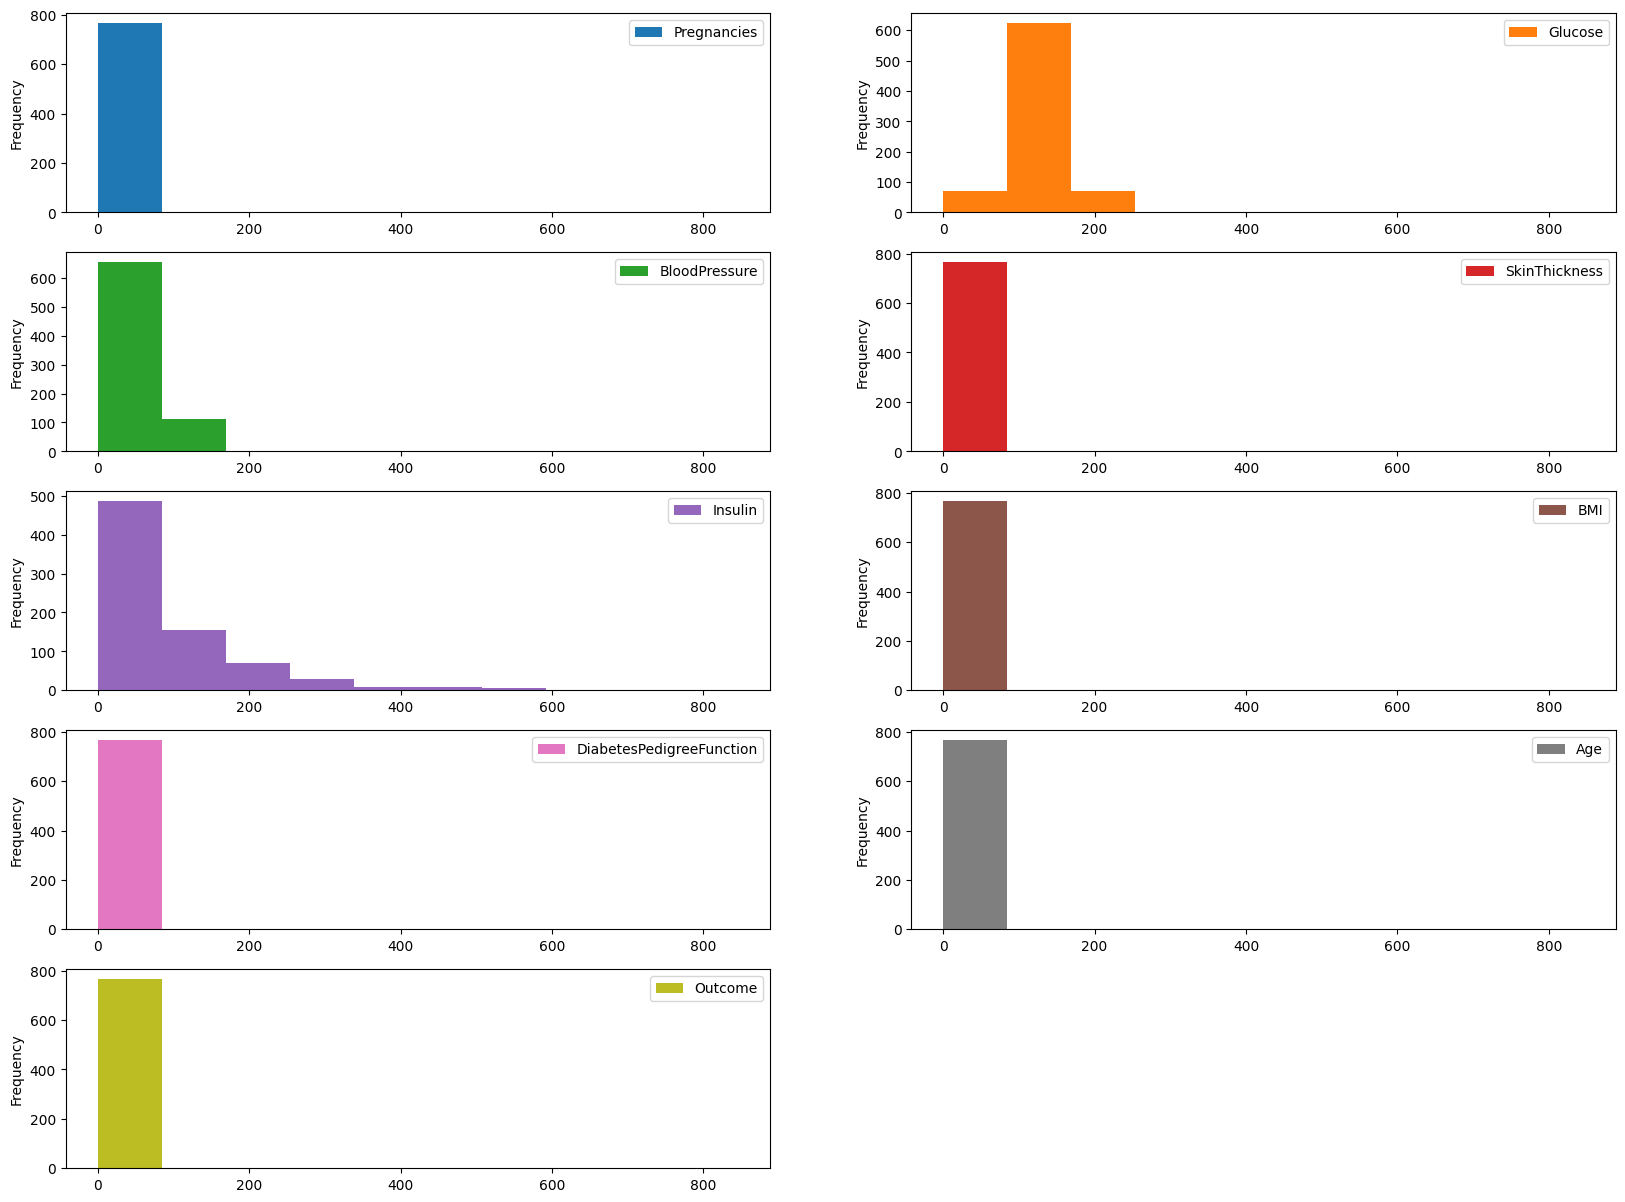

In [10]:
#histogram

plt.rcParams['figure.figsize'] = (20,15)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

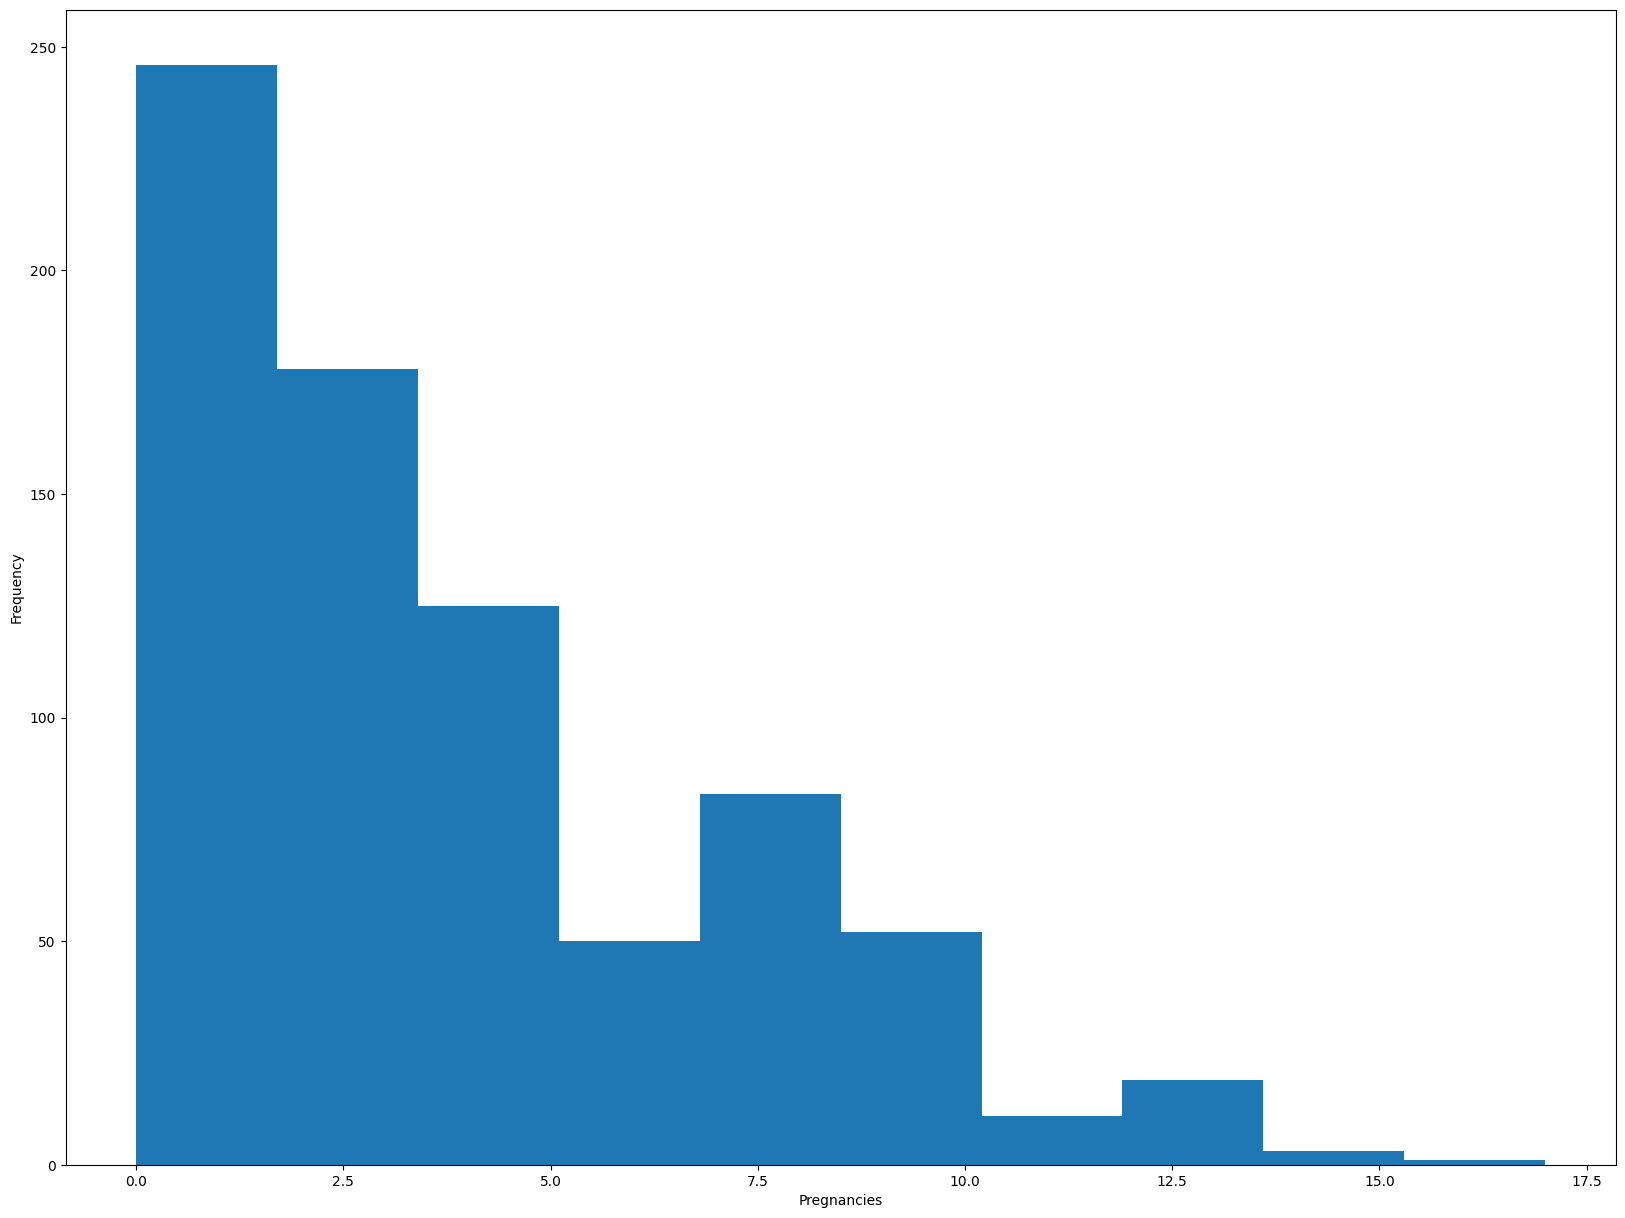

In [12]:
plt.hist(df['Pregnancies'], bins = 10)
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

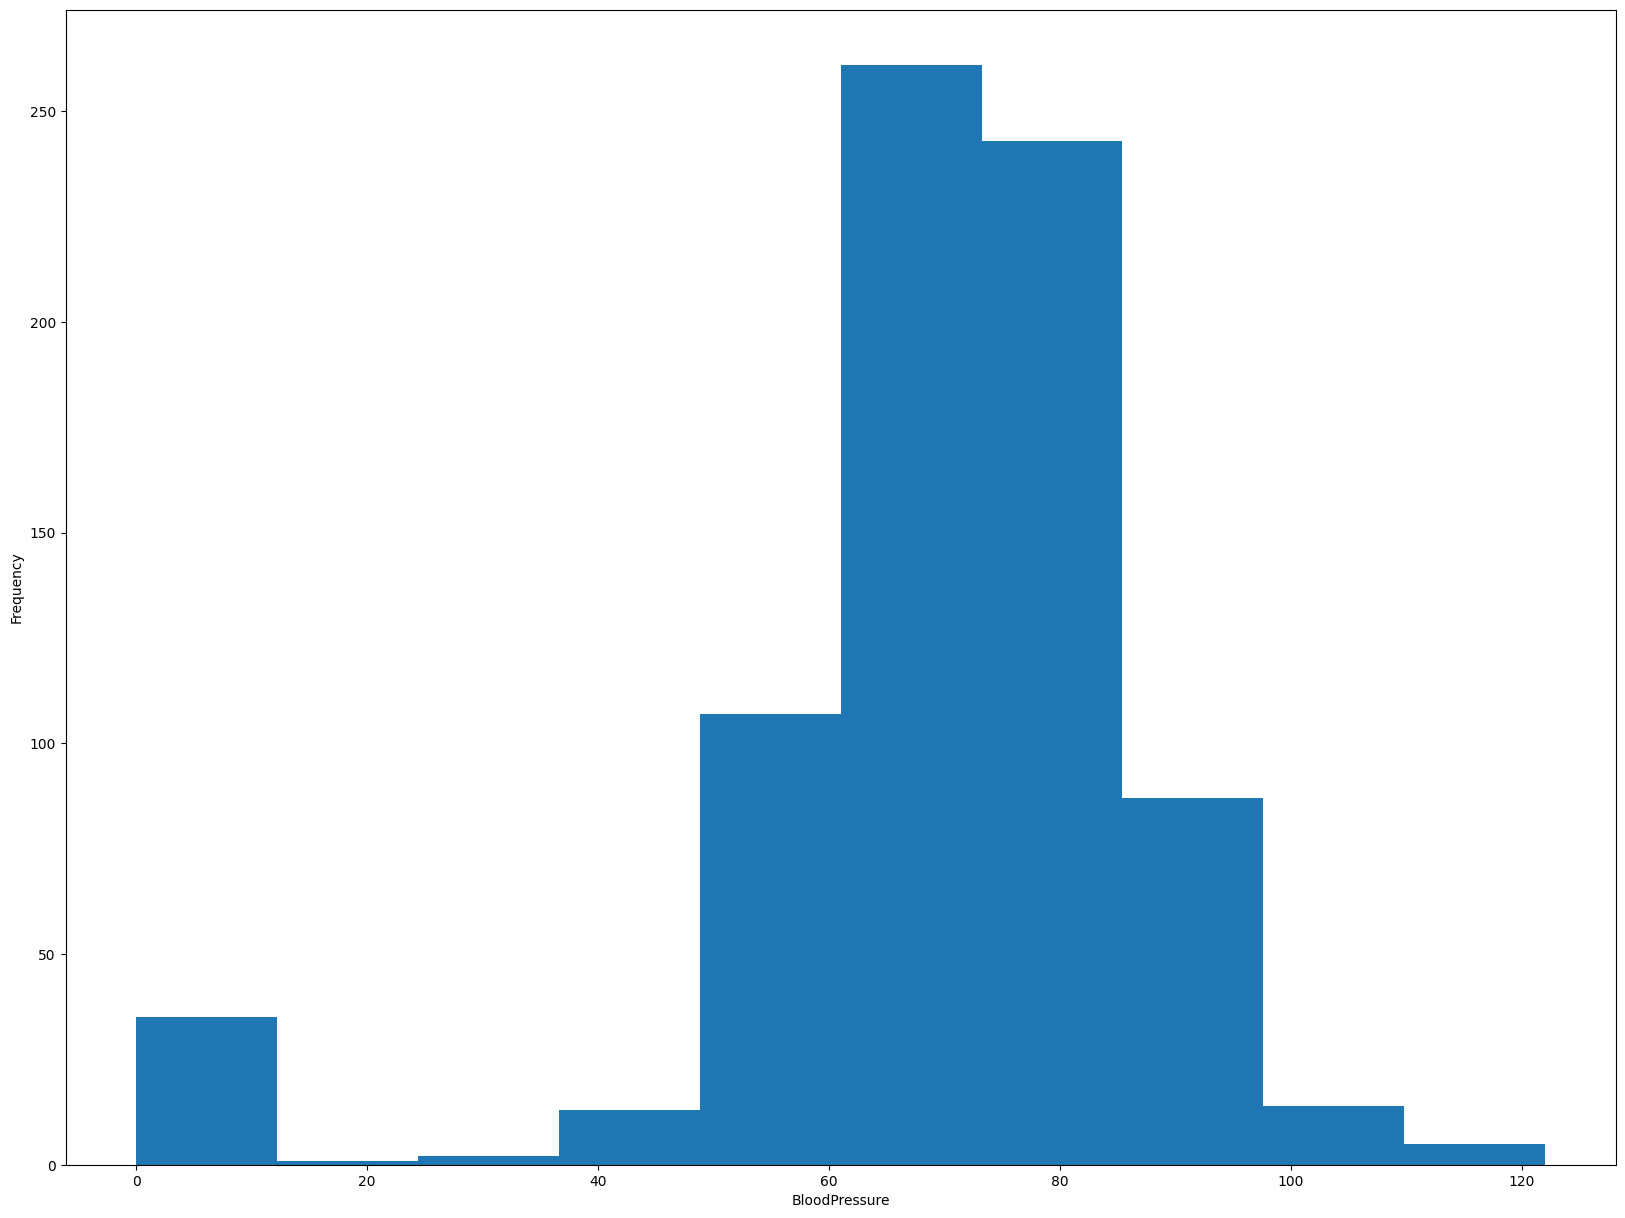

In [13]:
plt.hist(df['BloodPressure'], bins = 10)
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

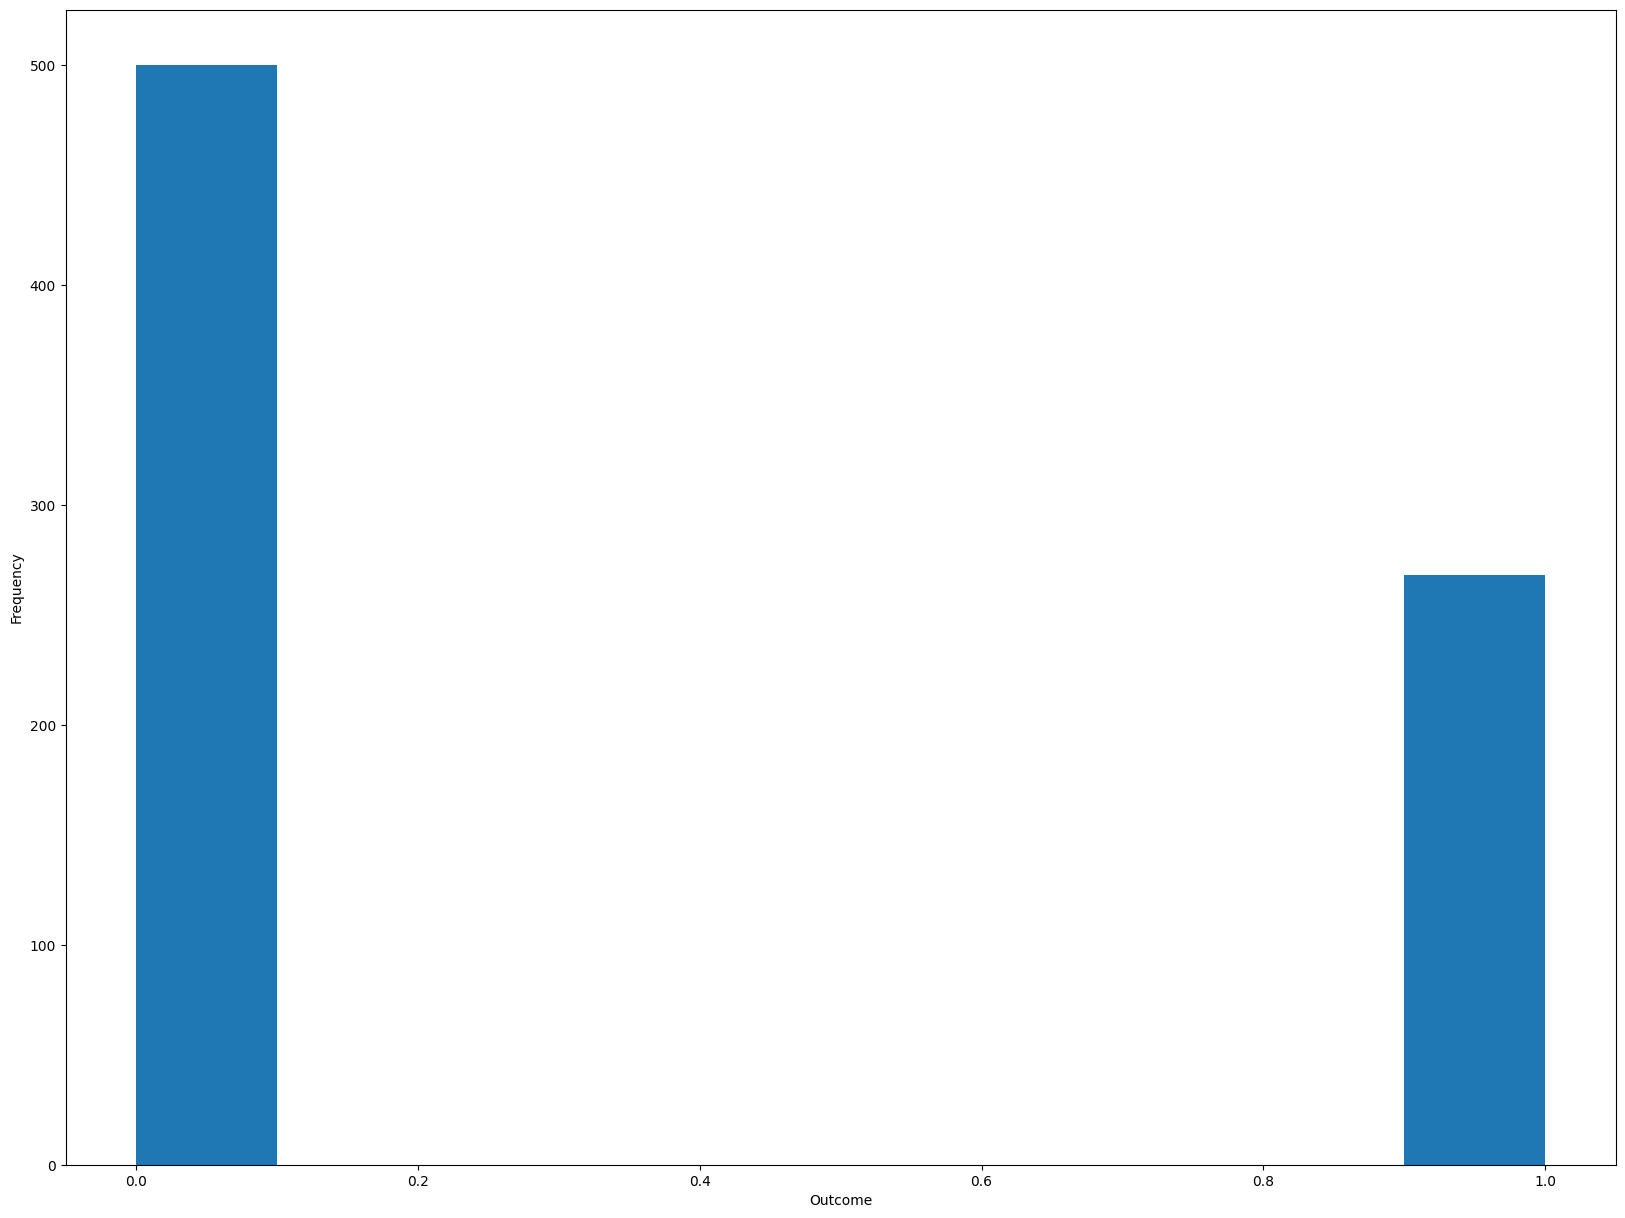

In [14]:
plt.hist(df['Outcome'], bins = 10)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

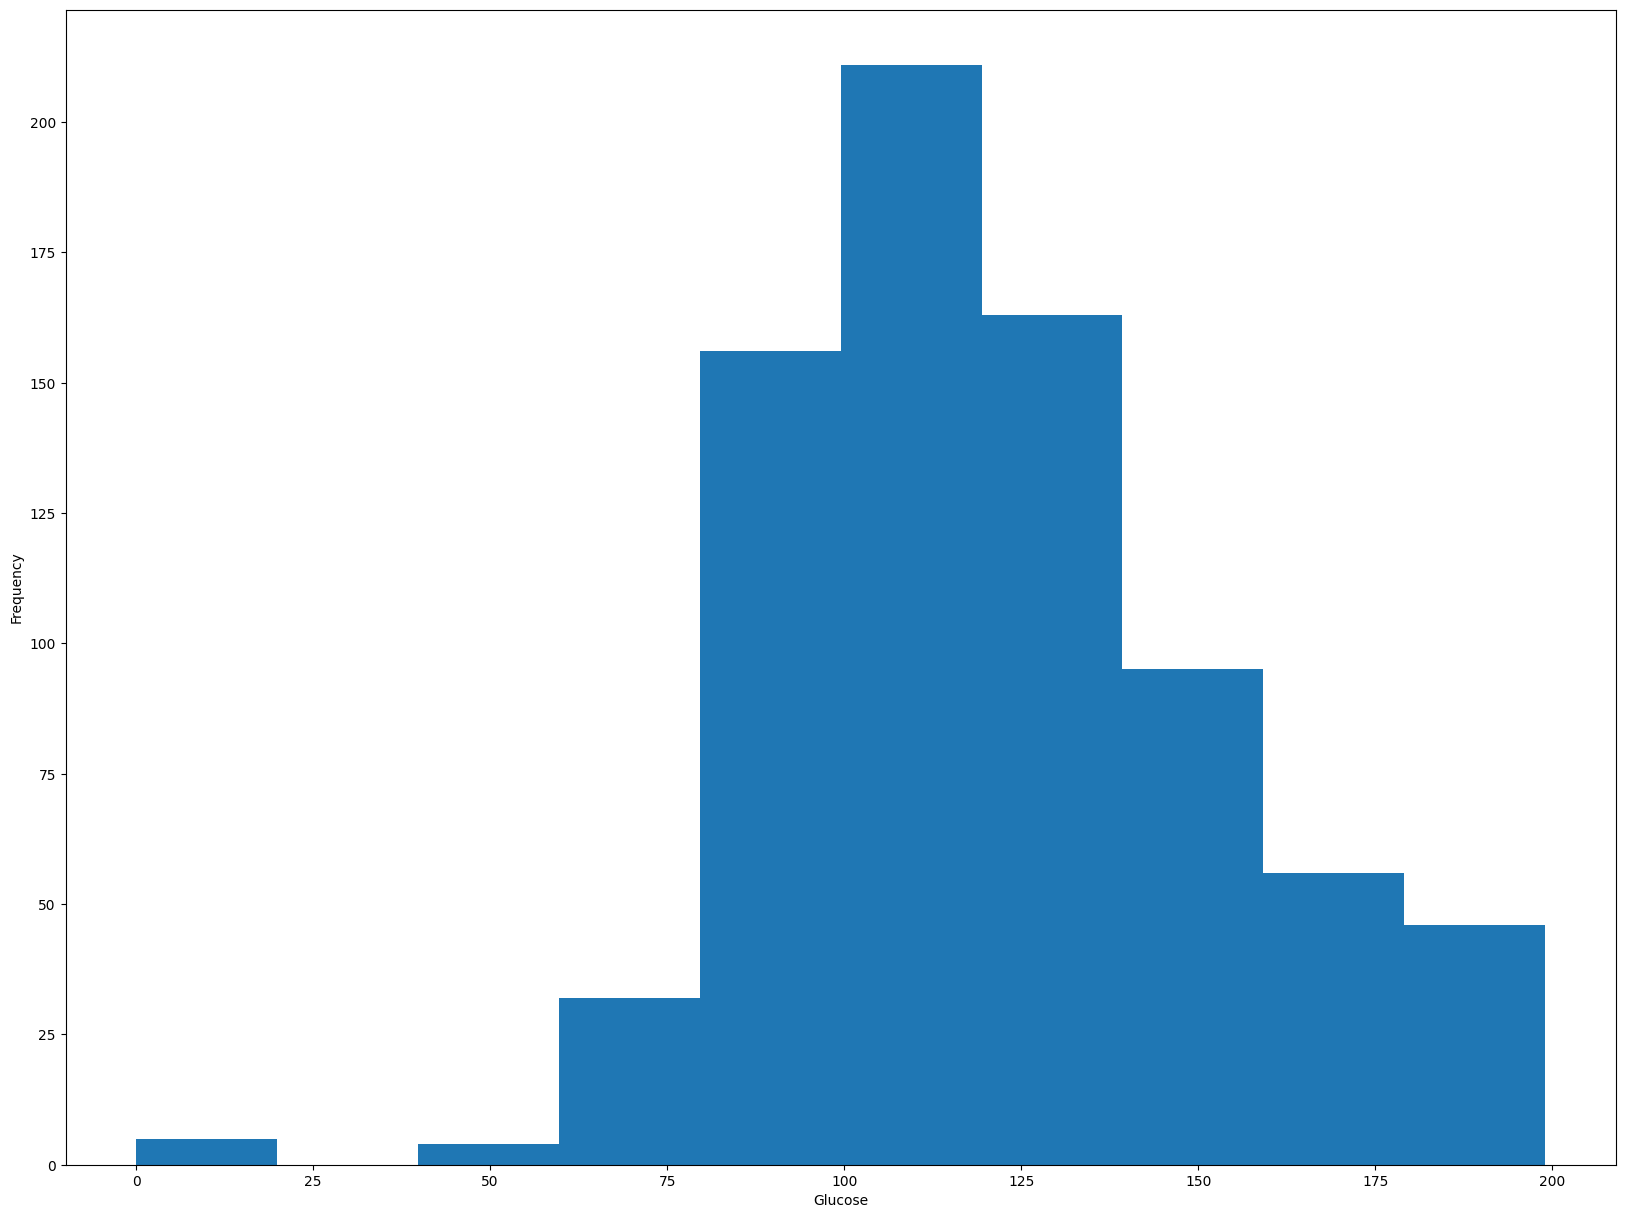

In [15]:
plt.hist(df[ 'Glucose'], bins = 10)
plt.xlabel( 'Glucose')
plt.ylabel('Frequency')
plt.show()

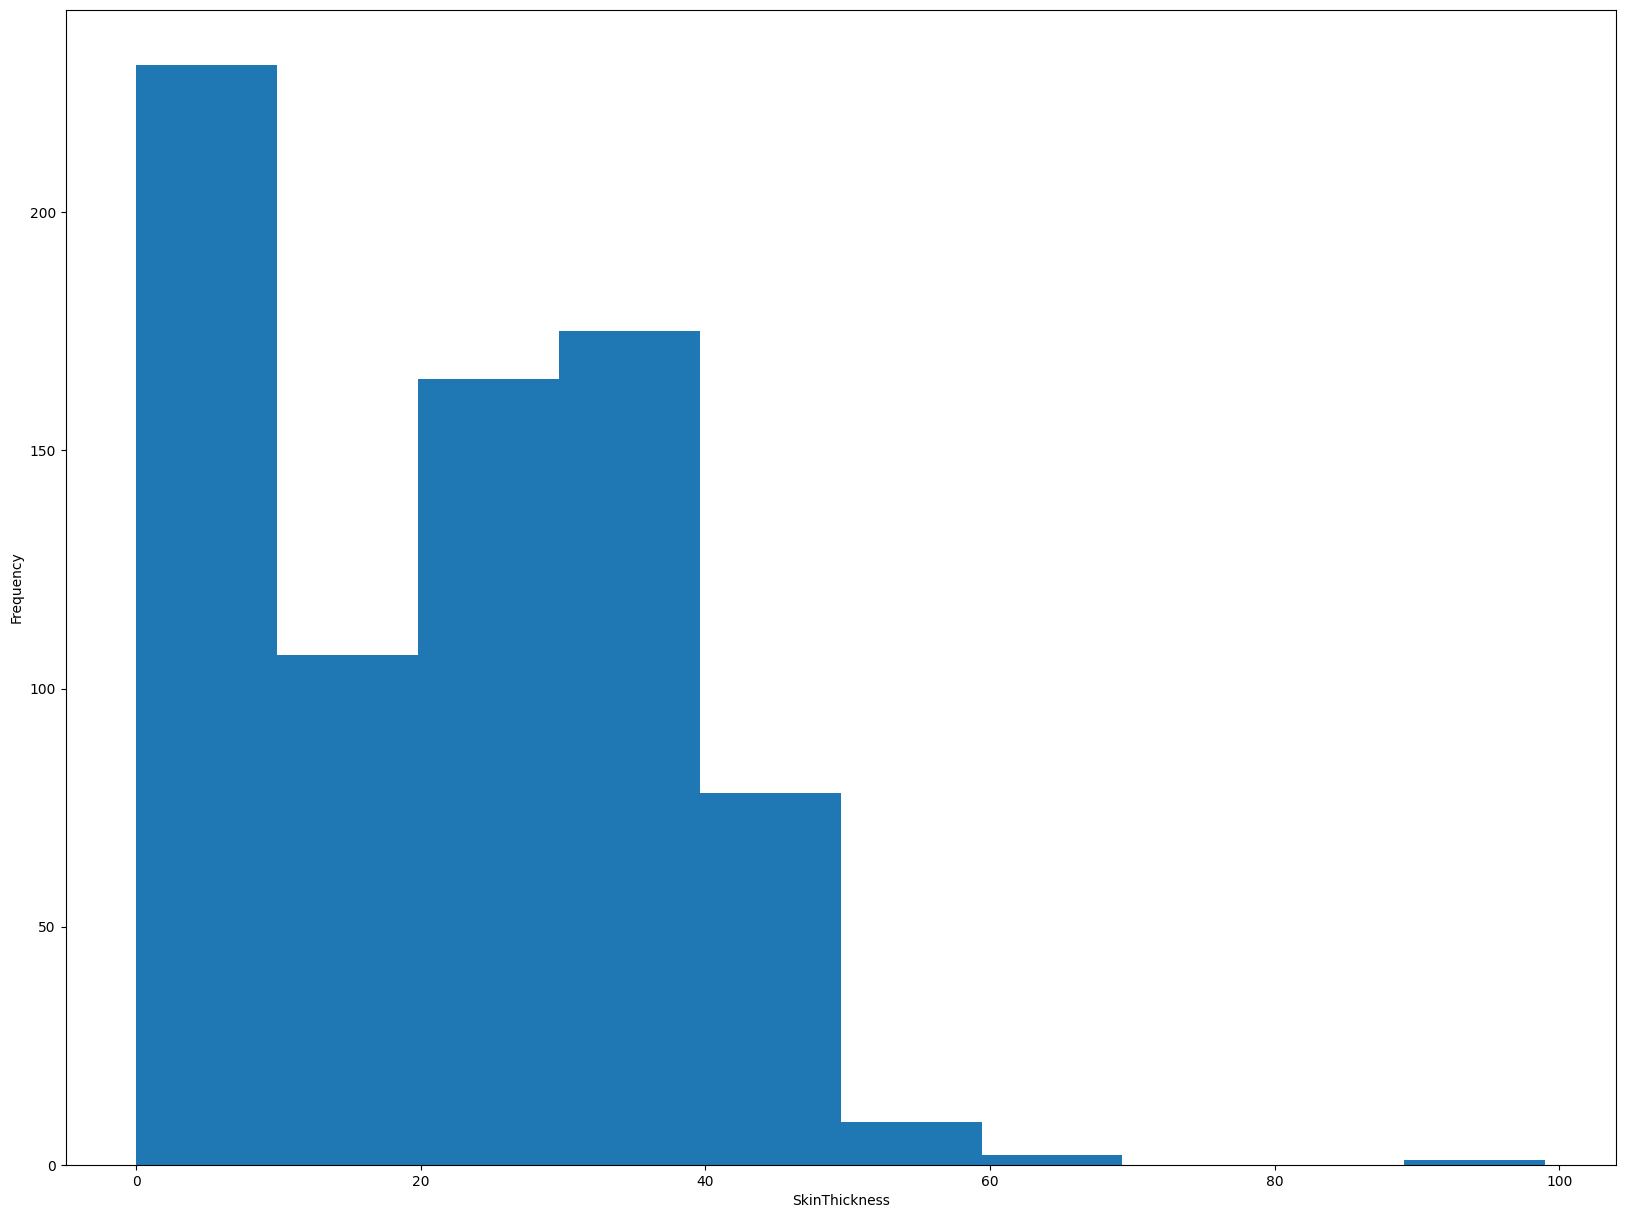

In [16]:
plt.hist(df['SkinThickness'], bins = 10)
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

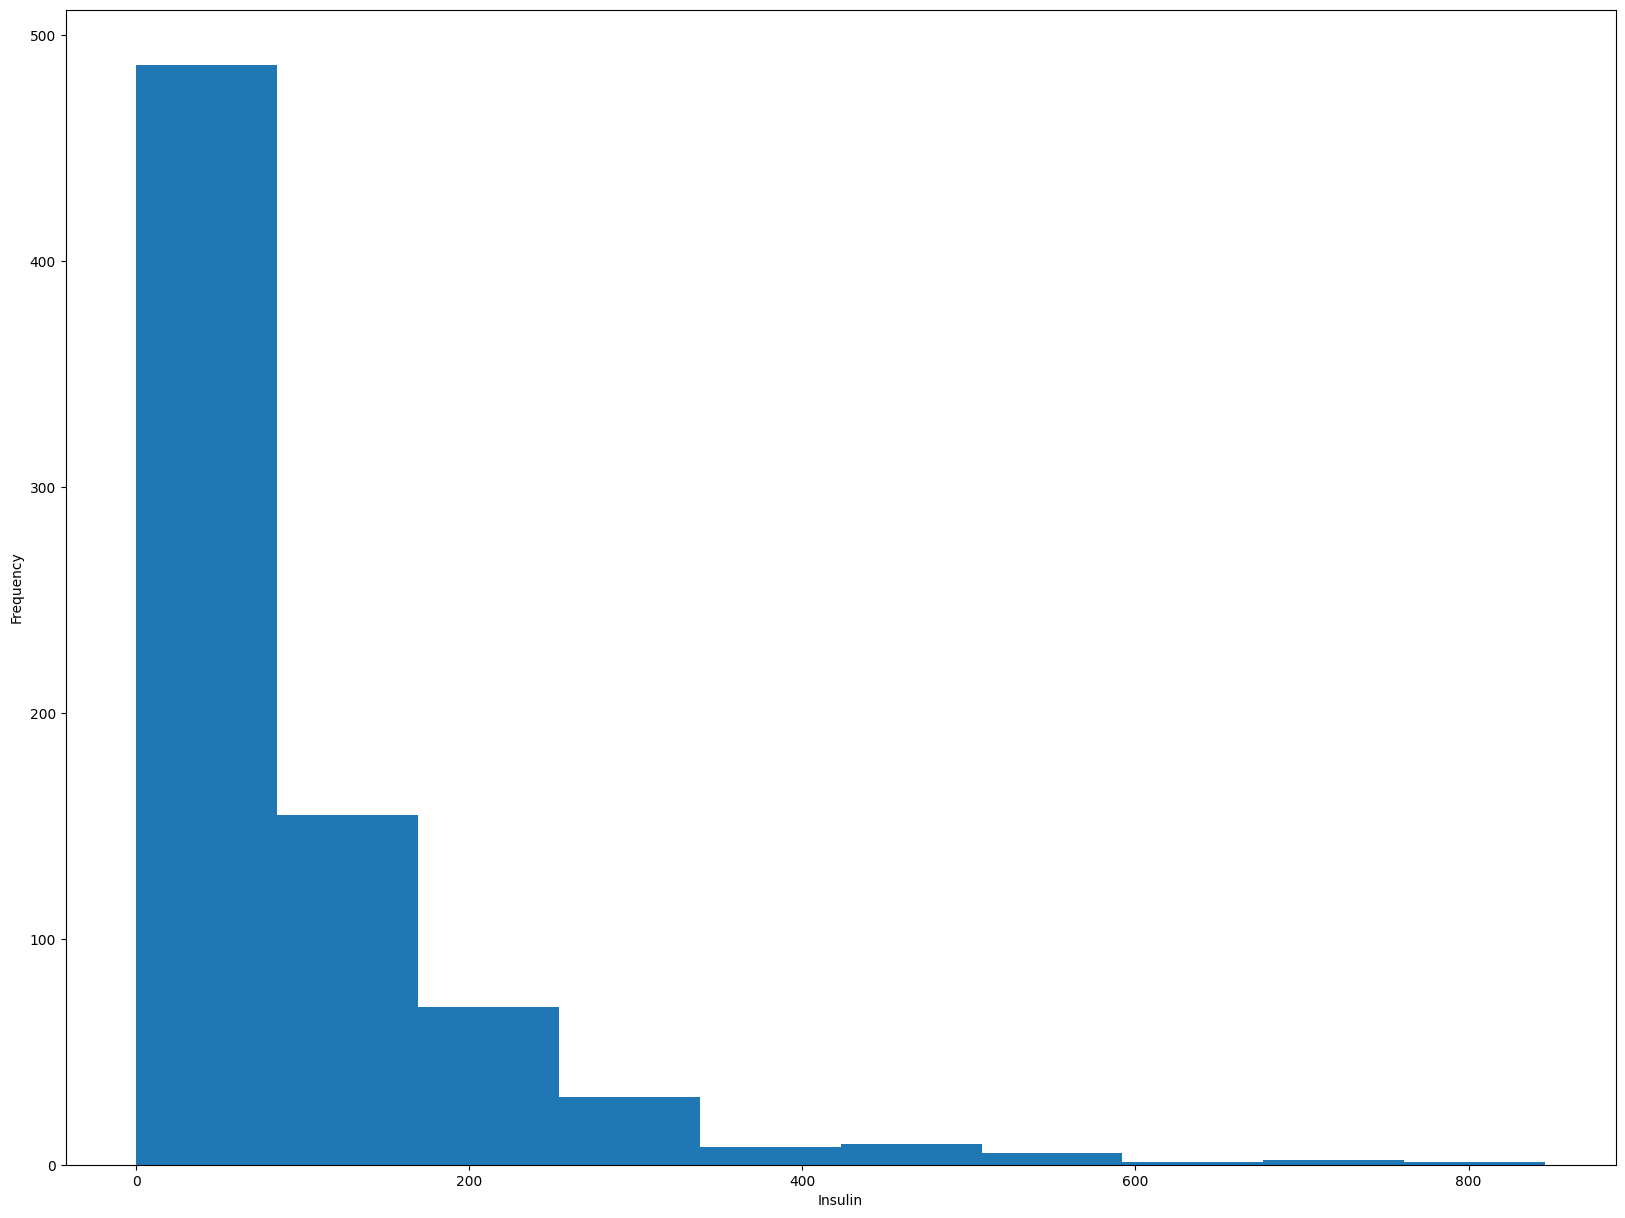

In [17]:
plt.hist(df['Insulin'], bins = 10)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

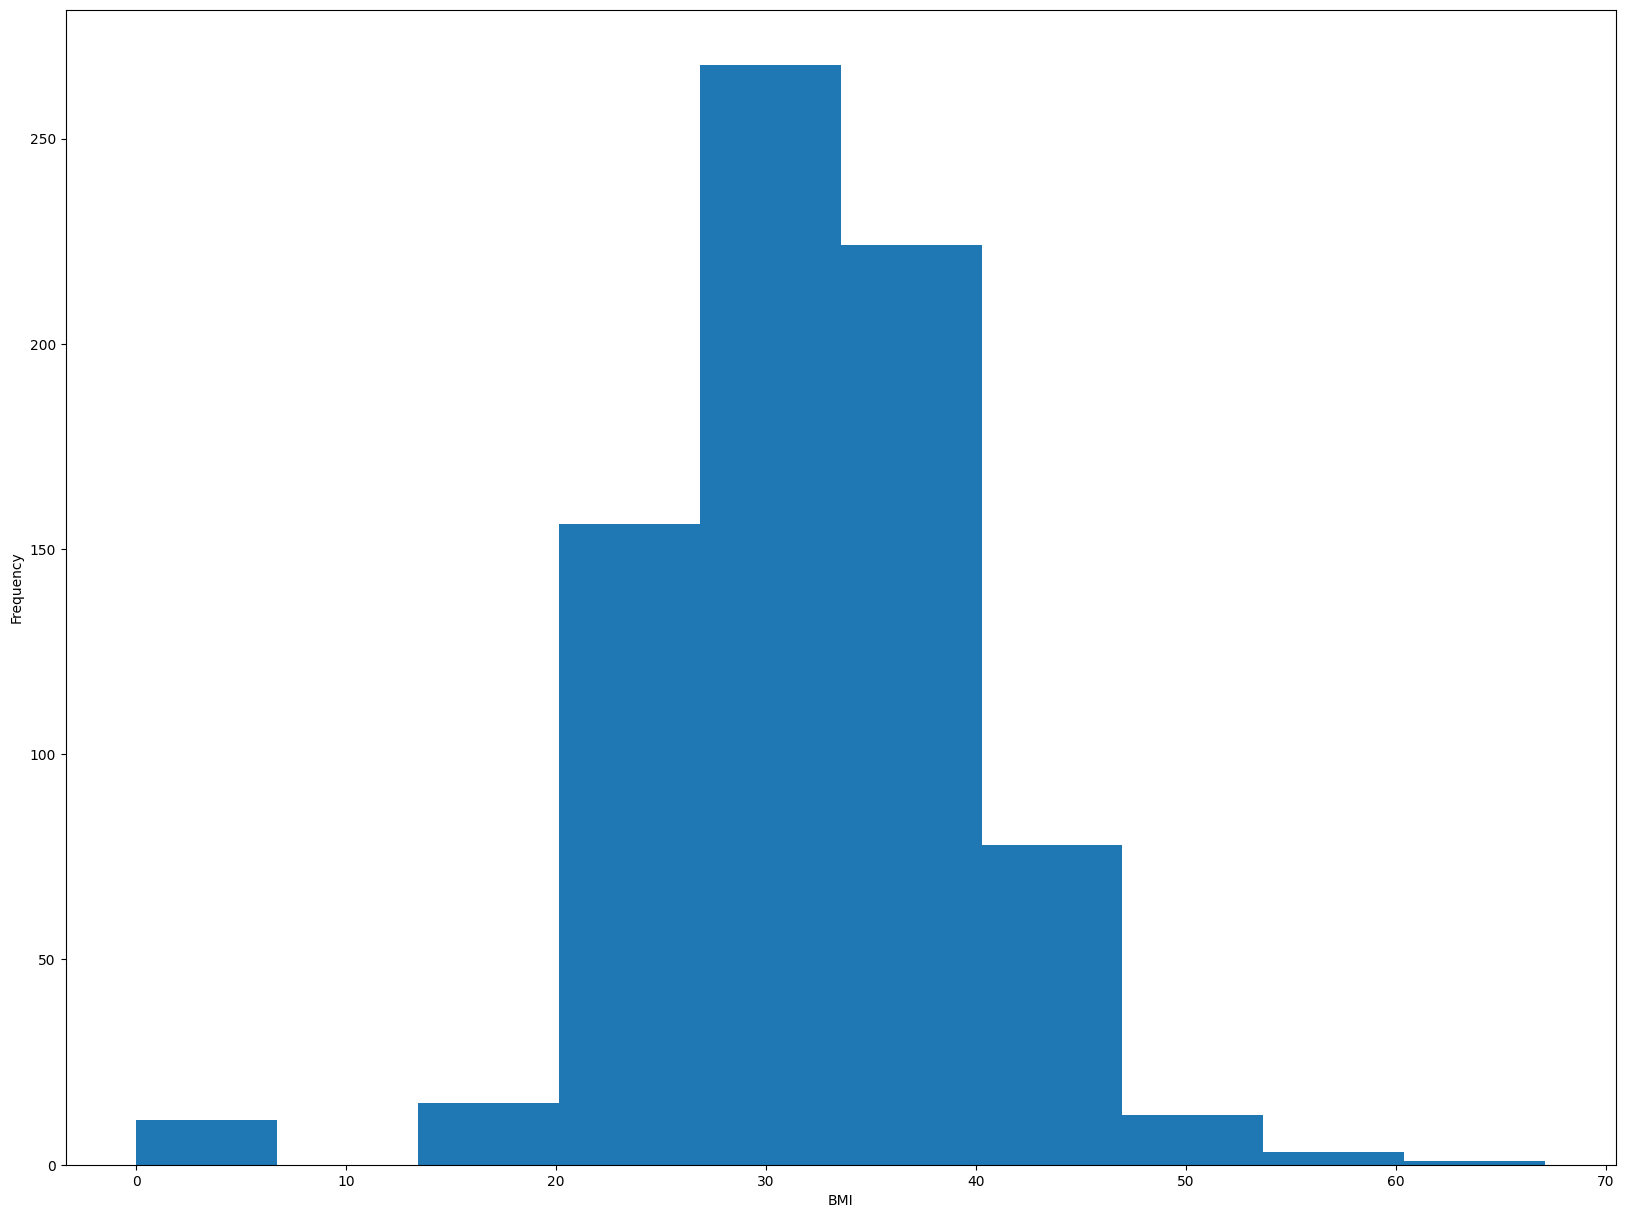

In [18]:
plt.hist(df['BMI'], bins = 10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

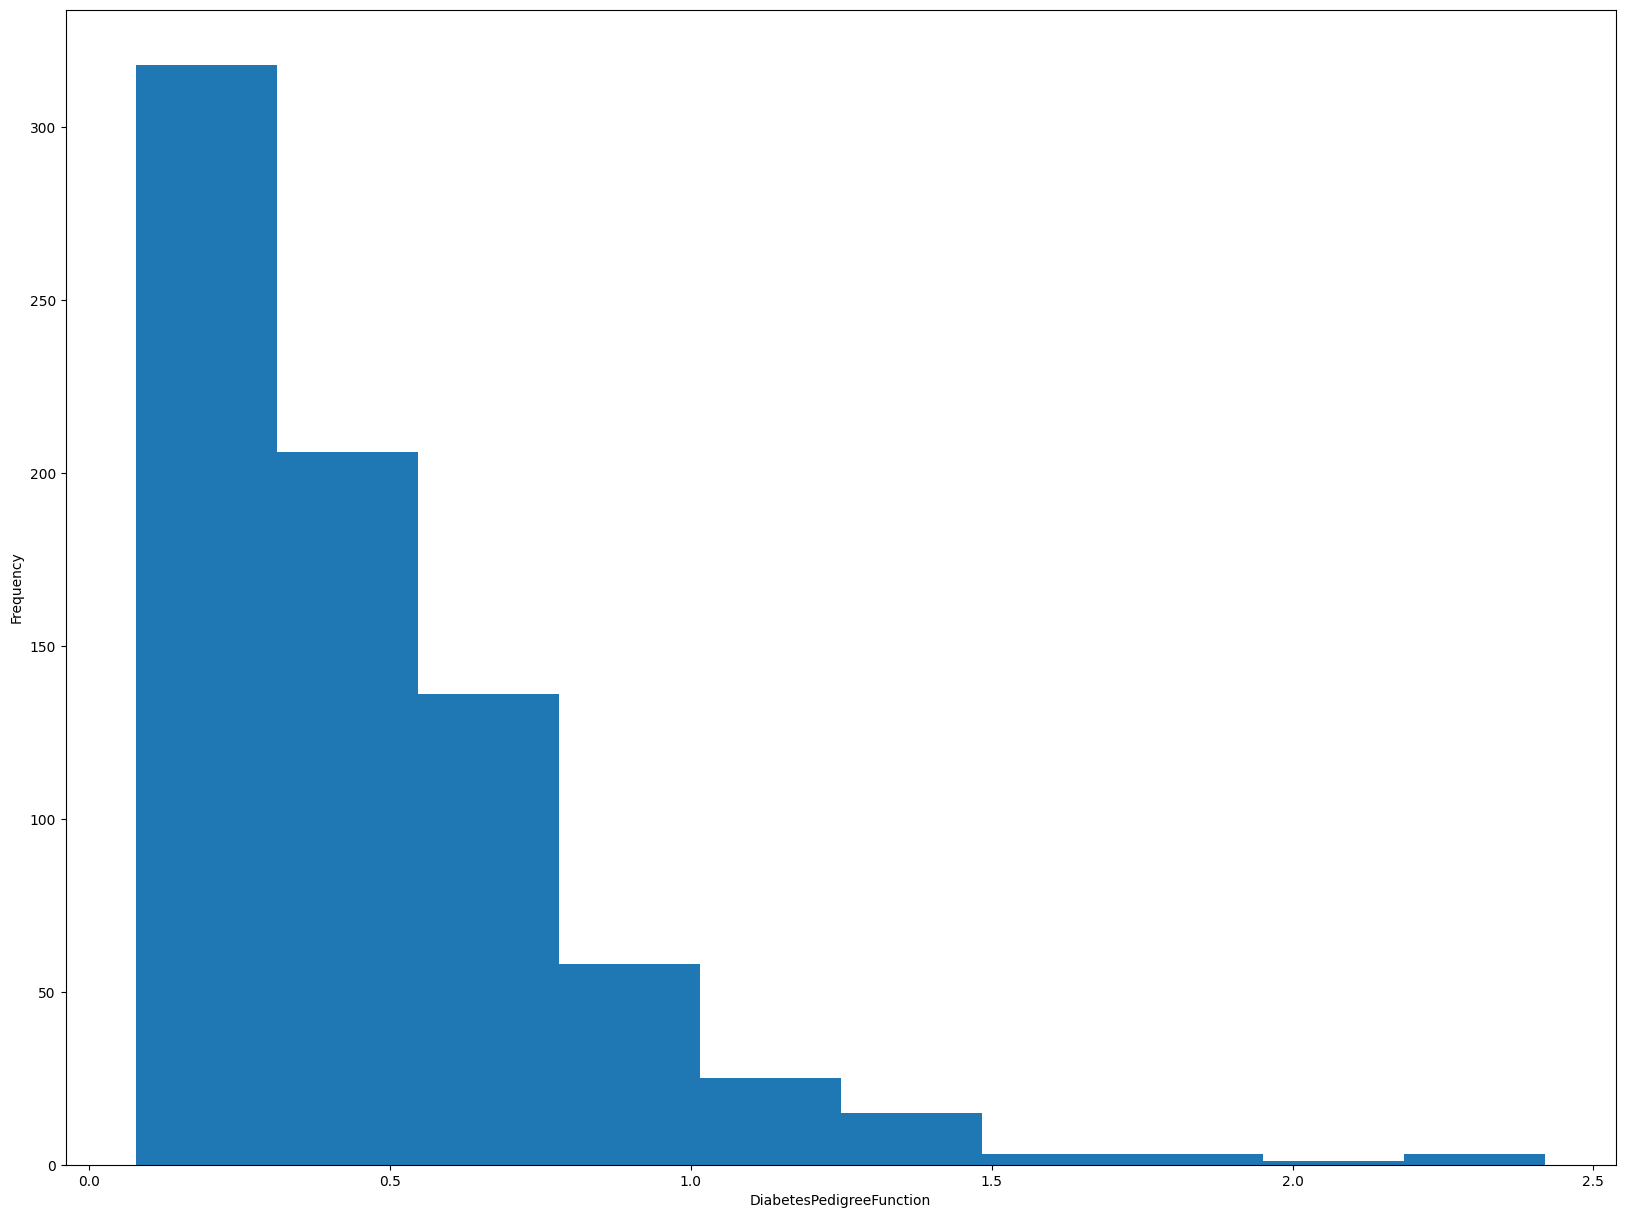

In [19]:
plt.hist(df['DiabetesPedigreeFunction'], bins = 10)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

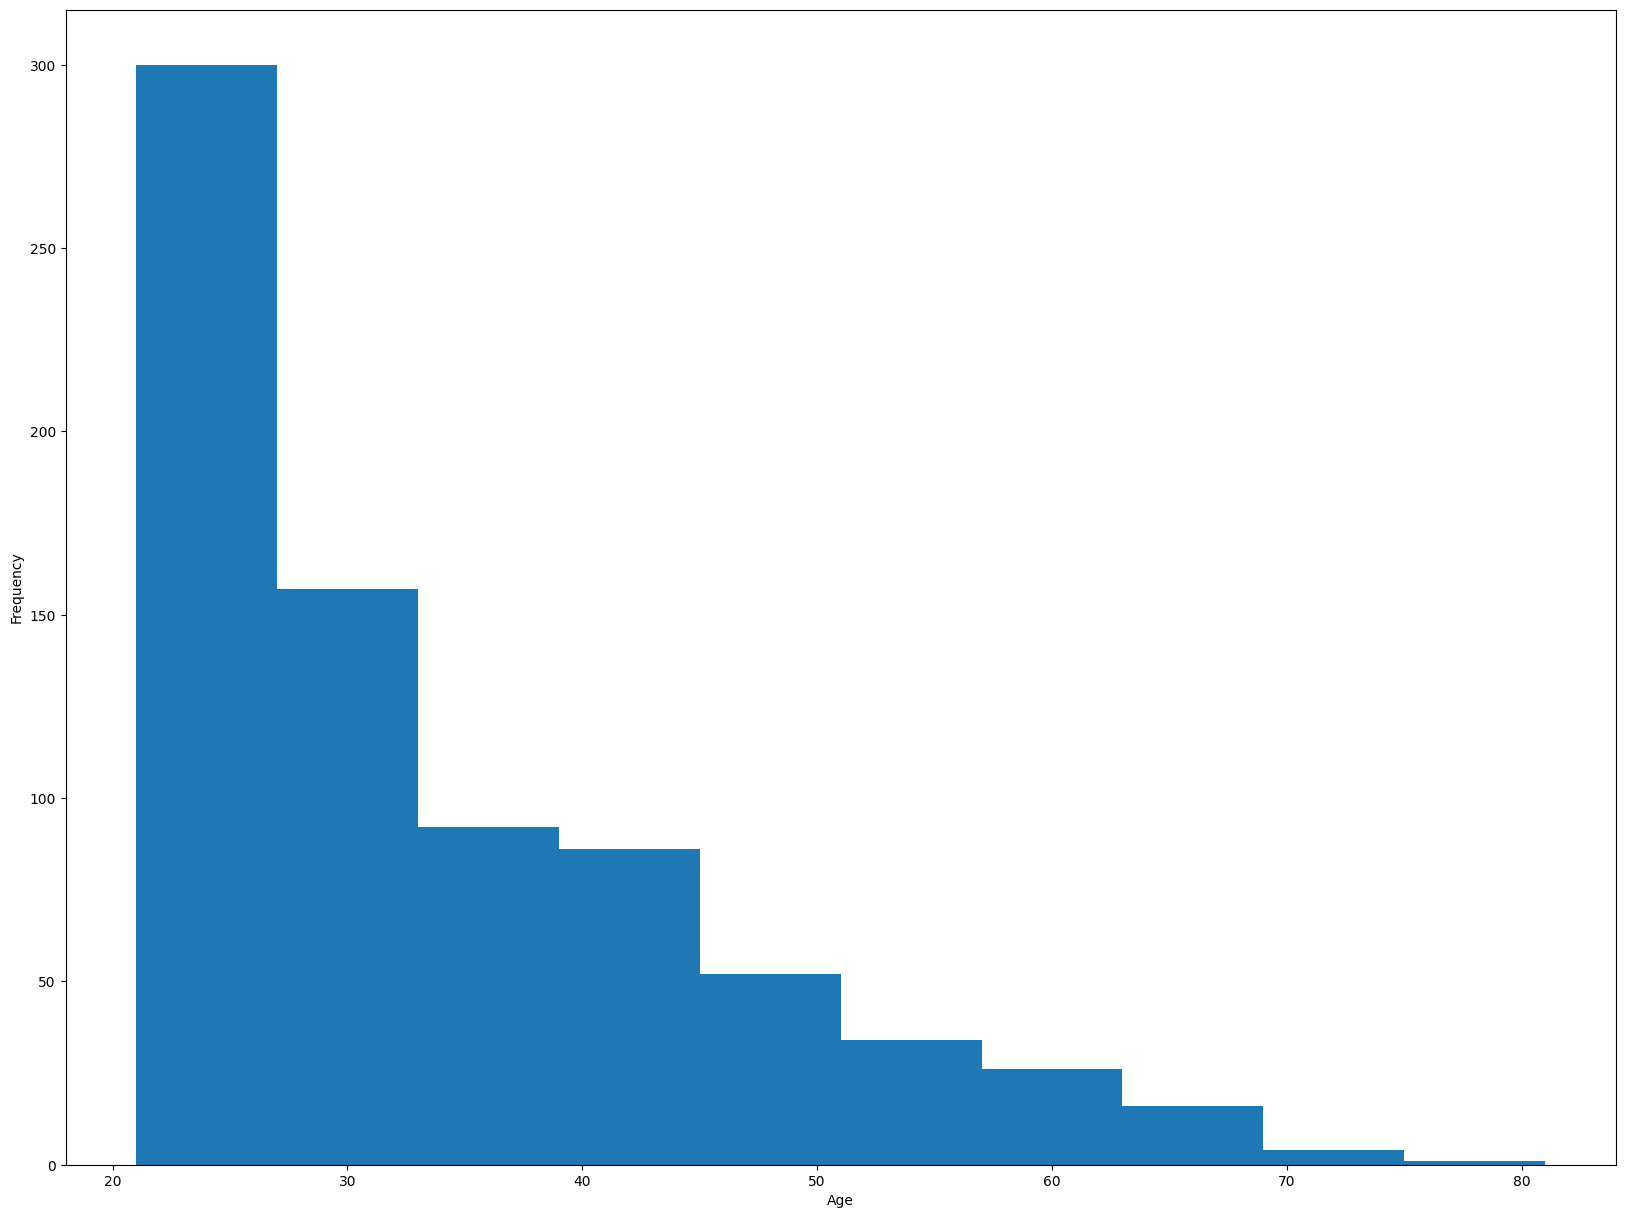

In [20]:
plt.hist(df['Age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [22]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#convert to an array - because machine learning can learn array only

In [24]:
from sklearn.preprocessing import StandardScaler
#normalization
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [25]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [26]:
correlations = df.corr()
#default is ascending
correlations['Outcome'].sort_values(ascending=True)

,Outcome
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
DiabetesPedigreeFunction,0.173844
Pregnancies,0.221898
Age,0.238356
BMI,0.292695
Glucose,0.466581
Outcome,1.000000


In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
-0.844885,135
-1.141852,111
-0.547919,103
-0.250952,75
0.046014,68
0.342981,57
0.639947,50
0.936914,45
1.233880,38


In [29]:
df['Pregnancies'].isnull().sum()

0

In [30]:
df['Glucose'].value_counts()

,count
Glucose,
-0.685236,17
-0.653939,17
-0.309671,14
0.253678,14
0.128489,14
...,...
2.194101,1
1.755941,1
-2.406579,1


In [31]:
df['BloodPressure'].value_counts()

,count
BloodPressure,
0.046245,57
0.253036,52
0.459827,45
-0.057150,45
0.149641,44
-0.263941,43
0.563223,40
0.356432,39
-0.470732,37


In [32]:
df['SkinThickness'].value_counts()

,count
SkinThickness,
-1.288212,227
0.719086,31
0.593630,27
0.405445,23
0.154533,22
0.781814,20
0.468173,20
-0.159107,20
0.656358,19


In [33]:
df['Insulin'].value_counts()

,count
Insulin,
-0.692891,374
0.218813,11
0.435886,9
0.522715,9
0.349057,8
...,...
-0.059039,1
0.791885,1
1.521248,1


In [34]:
pd.set_option('display.max_rows', None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,-0.732120
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1.365896
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,-0.732120
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1.365896
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1.365896


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [60]:
df['Pregnancies'] = df['Pregnancies'].round().astype(int)
df['Glucose'] = df['Glucose'].round().astype(int)
df['BloodPressure'] = df['BloodPressure'].round().astype(int)
df['SkinThickness'] = df['SkinThickness'].round().astype(int)
df['Insulin'] = df['Insulin'].round().astype(int)
df['BMI'] = df['BMI'].round().astype(int)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].round().astype(int)
df['Age'] = df['Age'].round().astype(int)
df['Outcome'] = df['Outcome'].round().astype(int)


In [62]:
#I change it to integer because it will affect when we want to to decision tree or KneighbourClassifier.
#it become float because i normalize the dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
 9   BloodPressuree            768 non-null    int64
 10   BMI                      768 non-null    int64
dtypes: int64(11)
memory usage: 66.1 KB


In [63]:
df['BMI'].value_counts()

,count
BMI,
0,331
-1,203
1,164
2,36
-2,15
-4,11
3,7
4,1


In [64]:
df['DiabetesPedigreeFunction'].value_counts()

,count
DiabetesPedigreeFunction,
-1,317
0,265
1,133
2,33
3,11
4,5
5,2
6,2


In [65]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X[:5]

array([[ 1,  1,  0,  1, -1,  0,  0,  1,  0,  0],
       [-1, -1,  0,  1, -1, -1,  0,  0,  0, -1],
       [ 1,  2,  0, -1, -1, -1,  1,  0,  0, -1],
       [-1, -1,  0,  0,  0,  0, -1, -1,  0,  0],
       [-1,  1, -2,  1,  1,  1,  5,  0, -2,  1]])

In [52]:
y = df['Outcome']

In [66]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=5)
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [67]:
#divide training and testing

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(614, 10)

In [68]:
DS = DecisionTreeClassifier()

#training
DS.fit(X_train, y_train)

#testing
y_hat = DS.predict(X_test)

#evaluation
print('The accuracy score is: ', accuracy_score(y_test, y_hat))
print('')
print('The CM is: ', confusion_matrix(y_test, y_hat))
print('')
print('The Jaccard Score is: ', jaccard_score(y_test, y_hat, average='micro'))

The accuracy score is:  0.6818181818181818

The CM is:  [[73 26]
 [23 32]]

The Jaccard Score is:  0.5172413793103449


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluation

print('The accuracy is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy is:  73.37662337662337


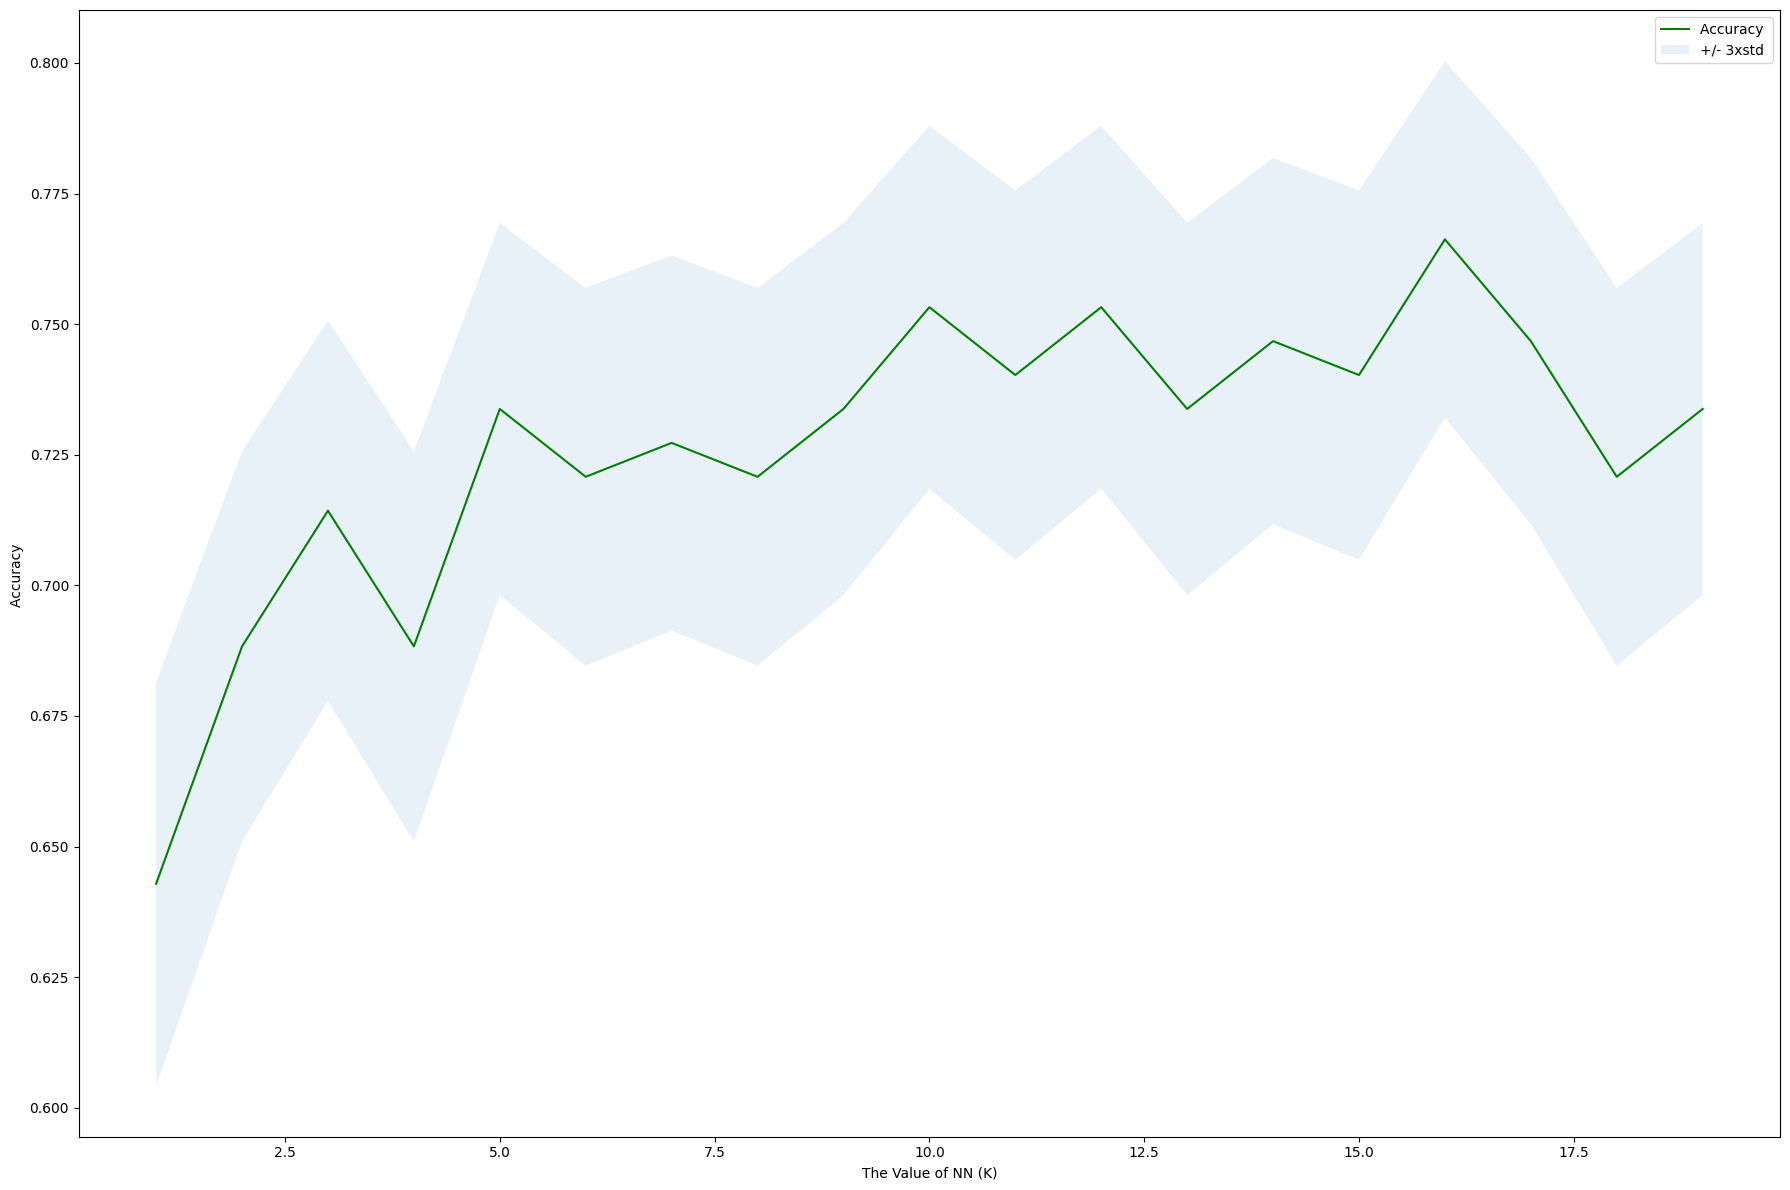



The best accuracy was with 0.7662337662337663 with k= 16


In [72]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =20   #the range of K
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): #ni dia run from K=1 until Ks=...

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
